In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle
def color_cycle():
    """
        This is a cycle of colors.
    """
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']
    return cycle(colors)
colors = color_cycle()

# Modularity

Let's measure the modularity, 

$$Q = \dfrac{1}{2m}\sum_{ij}\left(A_{ij} - \dfrac{k_ik_j}{2m}\right)\delta(x_i, x_j)$$

from scratch.

To measure modularity, we need a graph and a group membership:

In [2]:
adjacency = [[0, 1, 1, 0, 0, 0],
             [1, 0, 1, 0, 0, 0],
             [1, 1, 0, 1, 0, 0],
             [0, 0, 1, 0, 1, 1],
             [0, 0, 0, 1, 0, 1],
             [0, 0, 0, 1, 1, 0]]
adjacency = np.array(adjacency)

In [3]:
g = nx.from_numpy_array(adjacency)

In [4]:
membership = {0: [0, 1, 2, 3],
              1: [4, 5]}

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


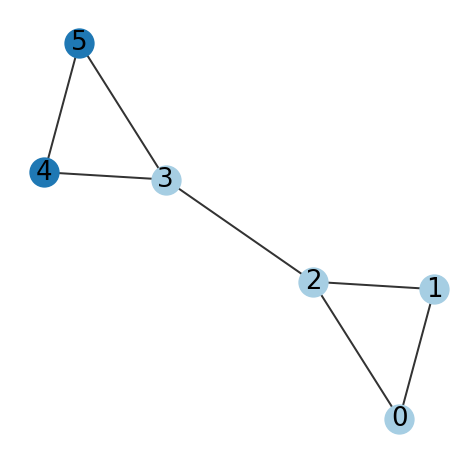

In [5]:
plt.figure(figsize=(4, 4)) 
pos = nx.spring_layout(g, seed=10, iterations=5000)
for p in membership:
    nx.draw_networkx_nodes(g, nodelist=membership[p], pos=pos, node_size=200, node_color=next(colors))
nx.draw_networkx_edges(g, pos, width=1.0, alpha=0.8)
nx.draw_networkx_labels(g, pos, font_size=13)
plt.axis('off')
plt.show()

We create a matrix for $\delta(x_i, x_j)$:

In [6]:
membership_ = dict([(v, k) for k in membership.keys() for v in membership[k]])
delta_i_j = [[membership_[i] == membership_[j] for i in range(len(adjacency))] for j in range(len(adjacency))]
delta_i_j = np.array(delta_i_j)
delta_i_j

array([[ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True, False, False],
       [ True,  True,  True,  True, False, False],
       [False, False, False, False,  True,  True],
       [False, False, False, False,  True,  True]])

We also create a matrix for $p_{ij} = \dfrac{k_ik_j}{2m}$:

In [7]:
degrees = g.degree()
two_m = 2*g.number_of_edges()

random_model = [[degrees[i]*degrees[j]/two_m for i in range(len(adjacency))] for j in range(len(adjacency))]
random_model = np.array(random_model)
random_model

array([[0.28571429, 0.28571429, 0.42857143, 0.42857143, 0.28571429,
        0.28571429],
       [0.28571429, 0.28571429, 0.42857143, 0.42857143, 0.28571429,
        0.28571429],
       [0.42857143, 0.42857143, 0.64285714, 0.64285714, 0.42857143,
        0.42857143],
       [0.42857143, 0.42857143, 0.64285714, 0.64285714, 0.42857143,
        0.42857143],
       [0.28571429, 0.28571429, 0.42857143, 0.42857143, 0.28571429,
        0.28571429],
       [0.28571429, 0.28571429, 0.42857143, 0.42857143, 0.28571429,
        0.28571429]])

Now we can multiply these matrices, sum the elements, then normalize it. 

In [8]:
np.sum((adjacency - random_model)* delta_i_j)/(two_m)

0.12244897959183675

From the `networkx` implementation:

In [9]:
nx.algorithms.community.quality.modularity(g, list(membership.values())) 

0.12244897959183673

## It is all a matrix multiplication!

It is the following matrix:

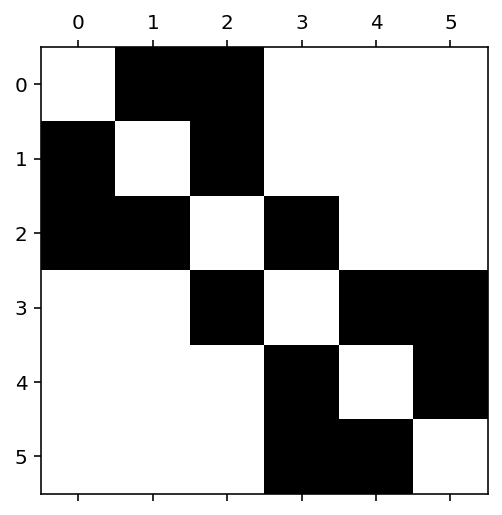

In [10]:
plt.matshow(adjacency, cmap=plt.cm.bone_r);

minus the following one:

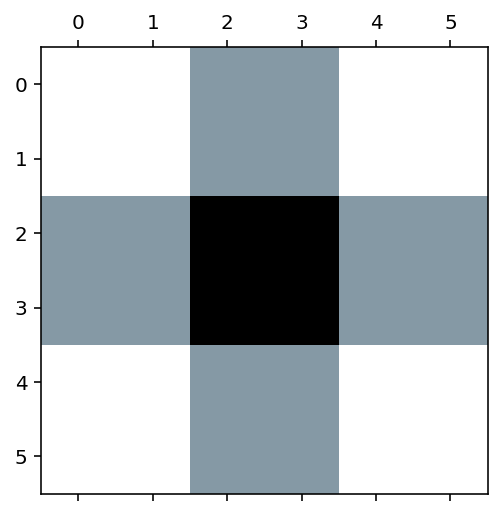

In [11]:
plt.matshow(random_model, cmap=plt.cm.bone_r);

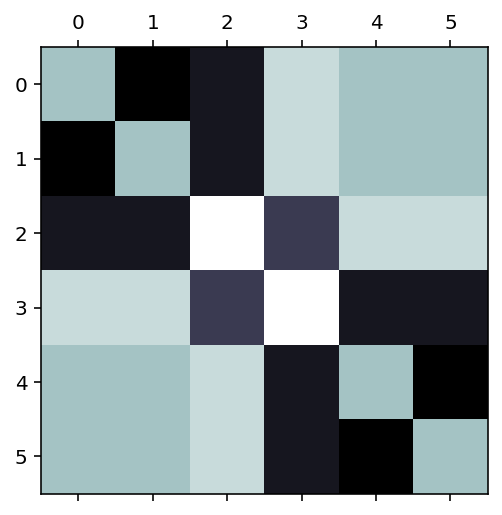

In [12]:
plt.matshow(adjacency - random_model, cmap=plt.cm.bone_r);

Then we multiply that result to the matrix:

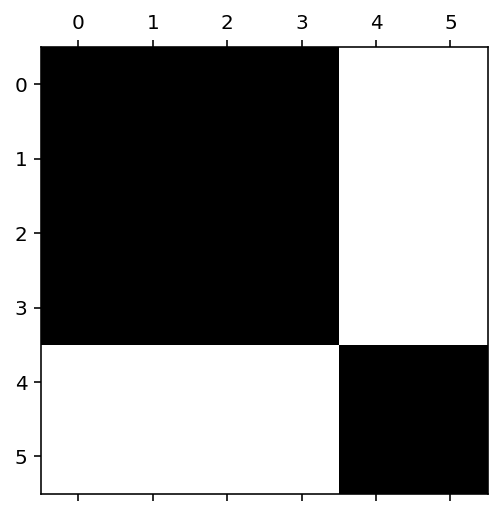

In [13]:
plt.matshow(delta_i_j, cmap=plt.cm.bone_r);

which result the following:

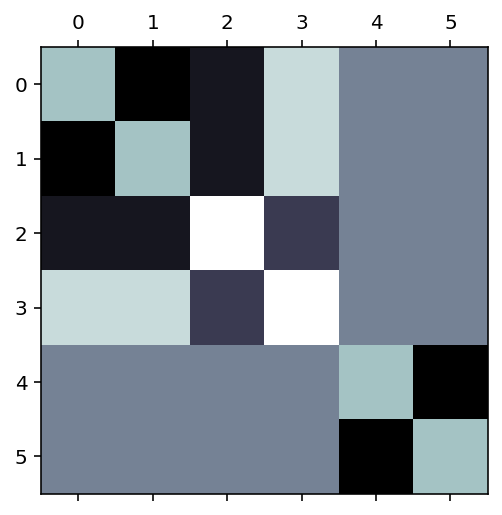

In [14]:
plt.matshow((adjacency - random_model)*delta_i_j, cmap=plt.cm.bone_r);

Then we sum up all the elements, and finally divide by $2m$.

In [15]:
np.sum((adjacency - random_model)*delta_i_j) / two_m

0.12244897959183675